In [2]:
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers
import pylab as plt
import numpy as np

In [3]:
token=ac.login('mgkadrmas')

In [4]:
def LMCParallax (ra,dec,radius):
    #take query
    res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(radius)+')')
    df=helpers.utils.convert(res,'table')
    good1 = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<20.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2)
    medpmra=np.median(df['pmra'][good1])
    medpmdec=np.median(df['pmdec'][good1])
    pndist=np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)
    good2 = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<19.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2) &(pndist<=2.0)
    medplx=np.median(df['parallax'][good2])+0.030112982075019102 #right mean distance? 
    ngood=np.sum(good2)
    print(ra, dec, radius, ngood, medplx)
    return (ngood, medplx)


In [4]:
radius=0.5
dtype = np.dtype([('ra',float),('dec',float),('radius',float),('ngood',int),('parallax',float)])
cat = np.zeros([25,13],dtype=dtype)
for i in range (25):
    ra=i+67
    for j in range (13):
        dec=j-76
        (ngood, medplx) = LMCParallax(ra,dec,radius) 
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['radius']=radius
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


67 -76 0.5 286 0.021558689700189253
67 -75 0.5 711 0.0251415706450357
67 -74 0.5 1273 0.015969560427023903
67 -73 0.5 1961 0.0127590595593676
67 -72 0.5 2299 0.018615001963071302
67 -71 0.5 2288 0.015342110427128752


KeyboardInterrupt: 

In [13]:
from astropy.table import Table 

In [14]:
acat = Table(cat)

In [15]:
acat.write('LMCParallax.fits', format='fits')

In [17]:
distmed=np.median(1/acat['parallax'])
print(distmed)

49.99999999999999


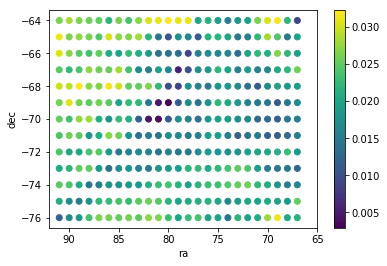

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([92,65])
sc = ax.scatter(acat['ra'],acat['dec'],c=acat['parallax'])
fig.colorbar(sc)

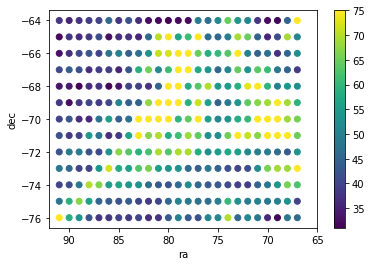

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([92,65])
sc = ax.scatter(acat['ra'],acat['dec'],c=1/acat['parallax'],vmax=75)
fig.colorbar(sc)

In [27]:
maxdist=np.amax(1/acat['parallax'])
print(maxdist)

341.46957381964035


In [29]:
mindist=np.amin(1/acat['parallax'])
print(mindist)

31.041565212687527


In [33]:
#take theta and i found in paper and try to get a predication of what the distances should look like
#use center O from email 

In [12]:
#ra-alpha #dec-delta #angdist-rho #phi-angpos #theta-zang #i-xang
racenter=81.9*np.pi/180
deccenter= -69.866667*np.pi/180
distcenter=50
xang=34.7*np.pi/180
zang=(122.5+90)*np.pi/180

In [13]:
import cmath as math

In [29]:
angdist=np.arccos(np.cos(dec*np.pi/180)*np.cos(deccenter)*np.cos((ra*np.pi/180)-(racenter))+np.sin(dec*np.pi/180)*np.sin(deccenter))


In [30]:
angpos=np.arccos((-np.cos(dec*np.pi/180)*np.sin((ra*np.pi/180)-(racenter)))/(np.sin(angdist)))

In [31]:
dist=((distcenter)*(np.cos(xang)))/(np.cos(xang)*np.cos(angdist)-np.sin(xang)*np.sin(angdist)*np.sin(angpos-zang))


In [32]:
ra=67
dec=-75

In [33]:
print(dist)

48.768237528615224


In [36]:
print(angdist)

0.11844384456357211


In [37]:
print(angpos)

0.9725516880691624


In [21]:
#run on all points make a map of distances 

In [39]:
def preddist(ra,dec):
    racenter=81.9*np.pi/180
    deccenter= -69.866667*np.pi/180
    distcenter=50
    xang=34.7*np.pi/180
    zang=(122.5+90)*np.pi/180
    angdist=np.arccos(np.cos(dec*np.pi/180)*np.cos(deccenter)*np.cos((ra*np.pi/180)-(racenter))+np.sin(dec*np.pi/180)*np.sin(deccenter))
    angpos=np.arccos((-np.cos(dec*np.pi/180)*np.sin((ra*np.pi/180)-(racenter)))/(np.sin(angdist)))
    dist=((distcenter)*(np.cos(xang)))/(np.cos(xang)*np.cos(angdist)-np.sin(xang)*np.sin(angdist)*np.sin(angpos-zang))
    print(ra, dec, dist)
    return(dist)


In [40]:
dtype = np.dtype([('ra',float),('dec',float),('dist',float)])
dcat = np.zeros([25,13], dtype=dtype)
for i in range (25):
    ra=i+67
    for j in range (13):
        dec=j-76
        (dist) = preddist(ra,dec) 
        dcat[i,j]['ra']=ra
        dcat[i,j]['dec']=dec
        dcat[i,j]['dist']=dist

67 -76 48.30040645435061
67 -75 48.768237528615224
67 -74 49.26037188206444
67 -73 49.77785741865544
67 -72 50.32182211933383
67 -71 50.89348082675464
67 -70 51.494142776991055
67 -69 51.884381501755946
67 -68 51.471379051187284
67 -67 51.08033640784756
67 -66 50.71052113356399
67 -65 50.36125246285133
67 -64 50.03189800912833
68 -76 48.23949089623592
68 -75 48.701805440704796
68 -74 49.188195318670445
68 -73 49.69969017997068
68 -72 50.23739821921871
68 -71 50.80251279118023
68 -70 51.39631975176302
68 -69 51.68902698031259
68 -68 51.27043851445659
68 -67 50.87394742914716
68 -66 50.49880605576563
68 -65 50.14431936052386
68 -64 49.80984155274814
69 -76 48.17774526623087
69 -75 48.63448182262374
69 -74 49.11506532217862
69 -73 49.620507156091044
69 -72 50.15189573756893
69 -71 50.71040294953651
69 -70 51.297291296898294
69 -69 51.499636816823035
69 -68 51.07568630477676
69 -67 50.67396856371133
69 -66 50.29372104836388
69 -65 49.93423480163883
69 -64 49.59485096588832
70 -76 48.115195

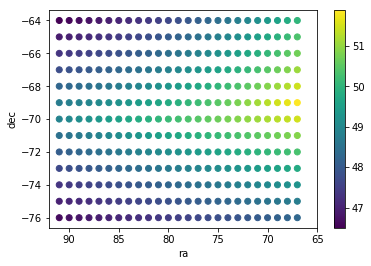

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([92,65])
sc = ax.scatter(dcat['ra'],dcat['dec'],c=dcat['dist'])
fig.colorbar(sc)

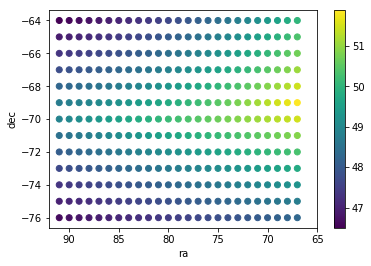

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([92,65])
sc = ax.scatter(dcat['ra'],dcat['dec'],c=dcat['dist'])
fig.colorbar(sc)